<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2021/week_8/TidyTuesday_DuBois_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and Data

Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

Data

In [2]:
# Image url -> image
dubois_plate_51 = 'https://raw.githubusercontent.com/ajstarks/dubois-data-portraits/master/plate51/original-plate-51.jpg'
image = io.imread(dubois_plate_51)

# Plate 51 data
df_freed_slaves = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-02-16/freed_slaves.csv')

# Inspect
df_freed_slaves.head()

,Year,Slave,Free
0,1790,92.0,8.0
1,1800,88.0,11.0
2,1810,86.5,13.5
3,1820,87.0,13.0
4,1830,86.0,14.0


# Plotting

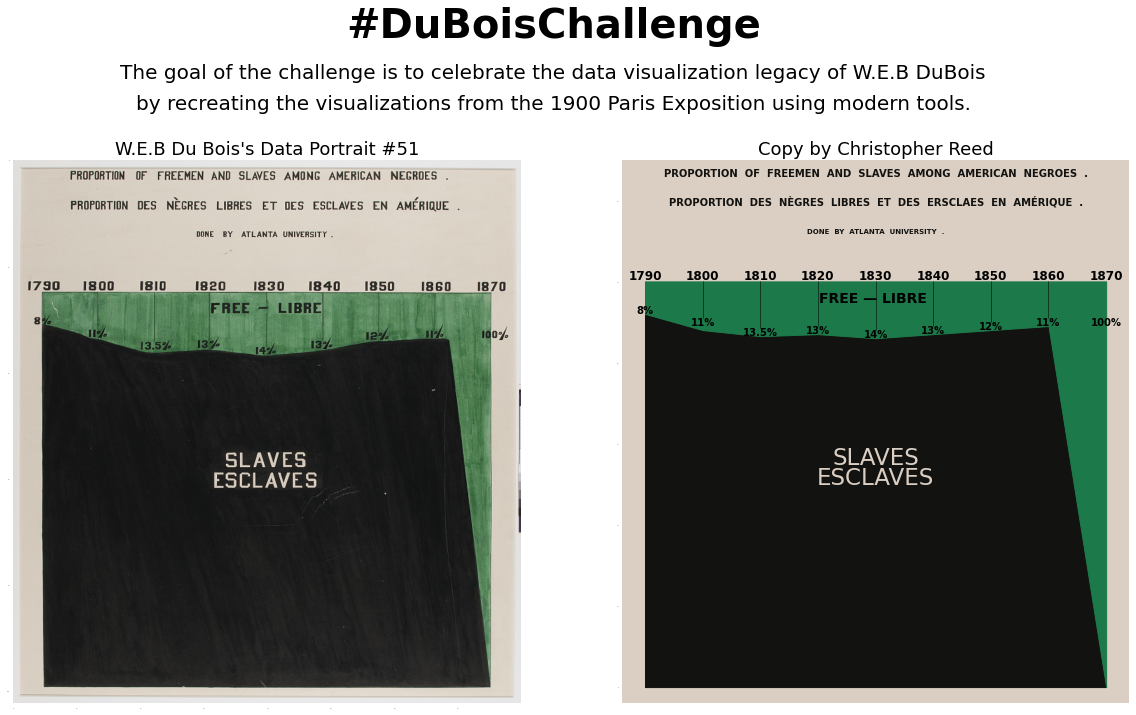

In [3]:
############################
## CREATE FIGURE AND AXES ##
############################

fig, (ax1, ax2) = plt.subplots(ncols = 2,
                               nrows = 1,
                               figsize = (20, 10))

##############
## MAIN VIZ ##
##############

# Original plate 51
ax1.imshow(image, aspect = 'auto')

# My recreation 
ax2.fill_between(x = df_freed_slaves['Year'], y1 = df_freed_slaves['Slave'], y2 = 0, color = '#121210')
ax2.fill_between(x = df_freed_slaves['Year'], y1 = df_freed_slaves['Slave'], y2 = 100, color = '#1c7949')

# Main text
ax2.text(x = 1830, y = 50,
         s = 'SLAVES\nESCLAVES',
         ha = 'center',
         fontsize = 23,
         linespacing = 0.85,
         color = '#dbcfc3')

ax2.text(x = 1830, y = 126,
         s = 'PROPORTION  OF  FREEMEN  AND  SLAVES  AMONG  AMERICAN  NEGROES  .',
         ha = 'center',
         fontsize = 10,
         weight = 'bold',
         color = '#121210')

ax2.text(x = 1830, y = 119,
         s = 'PROPORTION  DES  NÈGRES  LIBRES  ET  DES  ERSCLAES  EN  AMÉRIQUE  .',
         ha = 'center',
         fontsize = 10,
         weight = 'bold',
         color = '#121210')

ax2.text(x = 1830, y = 112,
         s = 'DONE  BY  ATLANTA  UNIVERSITY  .',
         ha = 'center',
         fontsize = 7,
         weight = 'bold',
         color = '#121210')

############
## TITLES ##
############

fig.text(x = 0.5, y = 1.05,
         s = '#DuBoisChallenge',
         fontsize = 40,
         ha = 'center',
         weight = 'bold')

fig.text(x = 0.5, y = 0.95,
         s = 'The goal of the challenge is to celebrate the data visualization legacy of W.E.B DuBois\nby recreating the visualizations from the 1900 Paris Exposition using modern tools.',
         fontsize = 20,
         linespacing = 1.8,
         ha = 'center')

ax1.set_title('W.E.B Du Bois\'s Data Portrait #51',
              fontsize = 18)

ax2.set_title('Copy by Christopher Reed',
              fontsize = 18)

############
## LABELS ##
############

label_x_values = df_freed_slaves['Year'].to_list()
label_values = df_freed_slaves['Free'].to_list()
label_values_format = [str(int(x)) + '%' for x in label_values]
label_values_format[2] = '13.5%'

for i in np.arange(len(label_values)):

  # Last tick is in line with second to last tick
  if i == len(label_values) - 1:
    y = 100.2 - label_values[-2]

  # All else
  else:
    y = 100.2 - label_values[i]

  ax2.text(x = label_x_values[i], y = y,
           s = label_values_format[i],
           ha = 'center',
           weight = 'bold')
  
####################
## VERTICAL LINES ##
####################

line_x_values = df_freed_slaves['Year'].to_list()[1:-1]
line_values = df_freed_slaves['Free'].to_list()[1:-1]

for i in np.arange(len(line_x_values)):
  ax2.plot([line_x_values[i], line_x_values[i]], [100, (102-line_values[i])],
           color = 'black',
           lw = 0.5)

###############
## FREE TEXT ##
###############

ax2.text(x = 1829.5, y = 95,
         s = 'FREE — LIBRE',
         fontsize = 14,
         ha = 'center',
         weight = 'bold')

###################
## FORMAT Y -AXIS##
###################

ax2.set_ylim(bottom = -4, top = 130)

#######################
## X TICK FORMATTING ##
#######################

# Move x ticks to ontop of x-axis. Set x-axis at y = 99.
ax2.xaxis.tick_top()
ax2.spines['top'].set_position(('data', 99))

# Label size, bold, exclude first and last tick
ax2.tick_params(axis = 'x', length = 0, labelsize = 12)
plt.xticks(weight = 'bold')

ax1.tick_params(axis = 'both', length = 0, labelsize = 0)
ax2.tick_params(axis = 'y', length = 0, labelsize = 0)

for ax in ax1, ax2:
  ax = sns.despine(left = True, bottom = True)

###############
## FACECOLOR ##
###############

ax2.set_facecolor('#dbcfc3')

##########
## SAVE ##
##########

plt.savefig('Du Bois Challenge Portrait 51', bbox_inches = 'tight')

# Takeaways 



*   How to access an image on GitHub with a url
*   Using `matplotlib`'s `fill_between` function
*   Adding text to plots
*   Transform between data and figure coordinates


